<a href="https://colab.research.google.com/github/askuts/Recommendation-system-for-online-store-/blob/main/Clustering_and_Association_Rules_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("/content/B2c.xlsx")

In [ ]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD,DoW,Territory,Region,ToD,Q,Revenue,DUNH,B2B
0,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,"2,55",13085,United Kingdom,07:46:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,"30,6",24,0
1,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,"3,75",13085,United Kingdom,07:46:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,45,24,0
2,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,"1,65",13085,United Kingdom,07:46:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,"39,6",24,0
3,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,"2,55",13085,United Kingdom,07:46:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,"30,6",24,0
4,489440,22350,CAT BOWL,8,2009-12-01 09:43:00,"2,55",18087,United Kingdom,09:43:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,"20,4",24,0


In [ ]:
# Группируем по номеру чека и объединяем товары в одну строку

data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')
grouped_df = data.groupby('Invoice').agg({
    'StockCode': ', '.join,
    'Description': ', '.join,
    'Quantity': 'sum',
    'InvoiceDate': 'first',
    'Customer ID': 'first',
    'Country': 'first',
    'T': 'first',
    'M': 'first',
    'FD': 'first',
    'DoW': 'first',
    'Territory': 'first',
    'Region': 'first',
    'ToD': 'first',
    'Q': 'first',
    'Revenue': 'sum',
    'DUNH': 'first',
    'B2B': 'first'
    }).reset_index()

# Выводим результат
grouped_df.head(2000)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Customer ID,Country,T,M,FD,DoW,Territory,Region,ToD,Q,Revenue,DUNH,B2B
0,489435,"22350, 22349, 22195, 22353","CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HEA...",60,2009-12-01 07:46:00,13085,United Kingdom,07:46:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,45.0,24,0
1,489440,"22350, 22349","CAT BOWL , DOG BOWL , CHASING BALL DESIGN",16,2009-12-01 09:43:00,18087,United Kingdom,09:43:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,30.0,24,0
2,489444,POST,POSTAGE,1,2009-12-01 09:55:00,12636,USA,09:55:00,12,2009-12-01 00:00:00,Monday,North America,America,morning,Q4,0.0,24,0
3,489447,POST,POSTAGE,1,2009-12-01 10:10:00,12362,Belgium,10:10:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,0.0,24,0
4,489450,"22087, 85206A, 21895, 21896, 22083, 21871, 849...","PAPER BUNTING WHITE LACE, CREAM FELT EASTER EG...",100,2009-12-01 10:36:00,16321,Australia,10:36:00,12,2009-12-01 00:00:00,Monday,Oceania,Oceania,morning,Q4,47.0,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,506380,"22027, 22030, 22482, 84970S, 84970L, 22297, 22...","TEA PARTY BIRTHDAY CARD, SWALLOWS GREETING CAR...",107,2010-04-29 12:19:00,17222,United Kingdom,12:19:00,4,2010-04-29 00:00:00,Wednesday,West Europe,Europe,day,Q2,35.0,4,0
1996,506386,"22381, 20719, 22355, 20723, 22384, 20724, 2150...","TOY TIDY PINK RETROSPOT , WOODLAND CHARLOTTE ...",185,2010-04-29 12:43:00,15203,United Kingdom,12:43:00,4,2010-04-29 00:00:00,Wednesday,West Europe,Europe,day,Q2,0.0,4,0
1997,506387,21967,PACK OF 12 SKULL TISSUES,48,2010-04-29 12:44:00,15203,United Kingdom,12:44:00,4,2010-04-29 00:00:00,Wednesday,West Europe,Europe,day,Q2,0.0,4,0
1998,506389,"71459, 20941, 85104, 84755","HANGING JAM JAR T-LIGHT HOLDER, FROG CANDLE, S...",253,2010-04-29 12:55:00,17356,United Kingdom,12:55:00,4,2010-04-29 00:00:00,Wednesday,West Europe,Europe,day,Q2,15.0,4,0


# RFM

In [ ]:
import datetime as dt

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date
today = max(data['InvoiceDate'])
recency = (today - data.groupby('Customer ID')['InvoiceDate'].max()).dt.days
frequency = data.groupby('Customer ID').size()
monetary = data.groupby('Customer ID')['Revenue'].sum()

# Создаем DataFrame для RFM-анализа
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Присваиваем категории на основе квантилей
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=[0, 0.33, 0.67, 1], labels=['1', '2', '3'], duplicates='drop')
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.33, 0.67, 1], labels=['1', '2', '3'], duplicates='drop')
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=[0, 0.33, 0.67, 1], labels=['1', '2', '3'], duplicates='drop')

# Общая RFM-категория
rfm_df['RFM_Score'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df['RFM_Total'] = rfm_df['Recency'] + rfm_df['Frequency'] + rfm_df['Monetary']

# Выводим результат
print(rfm_df)

             Recency  Frequency  Monetary  R  F  M RFM_Score  RFM_Total
Customer ID                                                            
12346            529         33      46.0  3  3  2       332      608.0
12349            570          1       0.0  3  1  1       311      571.0
12352            262         26     174.0  2  3  3       233      462.0
12353            204          4       0.0  2  1  1       211      208.0
12356             22          2       0.0  1  1  1       111       24.0
...              ...        ...       ... .. .. ..       ...        ...
18280            277         10      30.0  2  2  2       222      317.0
18281            180         17      15.0  2  2  2       222      212.0
18282              7         12      13.0  1  2  2       122       32.0
18283             29        688      20.0  1  3  2       132      737.0
18287             42          5      45.0  1  1  2       112       92.0

[3769 rows x 8 columns]


In [ ]:
# Выводим результат
rfm_df

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Total
Customer ID,,,,,,,,
12346,529,33,46.0,3,3,2,332,608.0
12349,570,1,0.0,3,1,1,311,571.0
12352,262,26,174.0,2,3,3,233,462.0
12353,204,4,0.0,2,1,1,211,208.0
12356,22,2,0.0,1,1,1,111,24.0
...,...,...,...,...,...,...,...,...
18280,277,10,30.0,2,2,2,222,317.0
18281,180,17,15.0,2,2,2,222,212.0
18282,7,12,13.0,1,2,2,122,32.0


In [ ]:
# 1. Описательная статистика
print(rfm_df.describe())

           Recency    Frequency     Monetary    RFM_Total
count  3769.000000  3769.000000  3769.000000  3769.000000
mean    261.109047    34.037676    58.449191   353.595914
std     220.056651   105.570069   116.028019   250.731555
min       0.000000     1.000000     0.000000     3.000000
25%      50.000000     6.000000     0.000000   160.000000
50%     210.000000    13.000000    25.000000   328.000000
75%     430.000000    33.000000    72.000000   510.000000
max     738.000000  4116.000000  2665.000000  5251.000000


ВЫВОДЫ ПО ОПИСАТЕЛЬНОЙ СТАТИСТИКЕ

1. Recency (Давность покупок):

* Среднее значение Recency равно примерно 261, что означает, что в среднем клиенты делают покупку каждые 261 день.
* Медианное значение (50-й процентиль) равно 210, что может указывать на существование двух относительно больших групп клиентов — тех, кто делает покупки с более короткими интервалами, и тех, кто делает покупки реже.

2. Frequency (Частота покупок):

* Среднее значение Frequency равно примерно 34, что говорит о том, что в среднем клиенты совершают 34 покупки.
* Максимальное значение 4116 может указывать на наличие выбросов в данных.

3. Monetary (Сумма покупок):

* Среднее значение Monetary равно примерно 58.45, что означает среднюю сумму покупок клиентов.

4. Минимальные значения:

* В Recency, Frequency и Monetary есть клиенты с минимальными значениями, например, с Recency = 0 и Monetary = 0. Это может означать, что у этих клиентов была только одна покупка, или они не совершали покупок в течение долгого времени.

5. 25%, 50%, 75% квартили:

* 25% клиентов делают покупки каждые 50 дней или реже (Recency).
* 50% клиентов совершают 13 или менее покупок (Frequency).
* 75% клиентов тратят на покупки 72 или менее (Monetary).

In [ ]:
# 2. Корреляционный анализ
correlation_matrix = rfm_df[['Recency', 'Frequency', 'Monetary']].corr()
print(correlation_matrix)

            Recency  Frequency  Monetary
Recency    1.000000  -0.164021 -0.224037
Frequency -0.164021   1.000000  0.363100
Monetary  -0.224037   0.363100  1.000000


Из результатов корреляционного анализа можно сделать следующие выводы:

1. **Recency и Frequency:**
   - Коэффициент корреляции между Recency и Frequency составляет -0.164. Это слабая отрицательная корреляция.
   - Таким образом, существует небольшая тенденция: чем меньше давность последней покупки (Recency), тем чаще клиент совершает покупки (Frequency).

2. **Recency и Monetary:**
   - Коэффициент корреляции между Recency и Monetary составляет -0.224. Это также слабая отрицательная корреляция.
   - Это может указывать на то, что клиенты, совершившие покупку более давно, могут тратить меньше (Monetary), но корреляция не слишком выраженная.

3. **Frequency и Monetary:**
   - Коэффициент корреляции между Frequency и Monetary равен 0.363. Это умеренная положительная корреляция.
   - Таким образом, чем чаще клиент совершает покупки (Frequency), тем больше он тратит (Monetary).

ЧИСТИМ ВЫБРОСЫ

In [ ]:
Q1_recency = rfm_df['Recency'].quantile(0.25)
Q3_recency = rfm_df['Recency'].quantile(0.75)
IQR_recency = Q3_recency - Q1_recency

Q1_monetary = rfm_df['Monetary'].quantile(0.25)
Q3_monetary = rfm_df['Monetary'].quantile(0.75)
IQR_monetary = Q3_monetary - Q1_monetary

Q1_frequency = rfm_df['Frequency'].quantile(0.25)
Q3_frequency = rfm_df['Frequency'].quantile(0.75)
IQR_frequency = Q3_frequency - Q1_frequency

# Определение границ выбросов для каждого столбца
lower_bound_recency = Q1_recency - 2 * IQR_recency
upper_bound_recency = Q3_recency + 2 * IQR_recency

lower_bound_monetary = Q1_monetary - 2 * IQR_monetary
upper_bound_monetary = Q3_monetary + 2 * IQR_monetary

lower_bound_frequency = Q1_frequency - 2 * IQR_frequency
upper_bound_frequency = Q3_frequency + 2 * IQR_frequency

# Удаление выбросов
rfm_df_no_outliers = rfm_df[
    (rfm_df['Recency'] >= lower_bound_recency) & (rfm_df['Recency'] <= upper_bound_recency) &
    (rfm_df['Monetary'] >= lower_bound_monetary) & (rfm_df['Monetary'] <= upper_bound_monetary) &
    (rfm_df['Frequency'] >= lower_bound_frequency) & (rfm_df['Frequency'] <= upper_bound_frequency)
].dropna()

# Выводим результат
print(rfm_df_no_outliers)

             Recency  Frequency  Monetary  R  F  M RFM_Score  RFM_Total
Customer ID                                                            
12346            529         33      46.0  3  3  2       332      608.0
12349            570          1       0.0  3  1  1       311      571.0
12352            262         26     174.0  2  3  3       233      462.0
12353            204          4       0.0  2  1  1       211      208.0
12356             22          2       0.0  1  1  1       111       24.0
...              ...        ...       ... .. .. ..       ...        ...
18278             73          9      47.0  1  2  2       122      129.0
18280            277         10      30.0  2  2  2       222      317.0
18281            180         17      15.0  2  2  2       222      212.0
18282              7         12      13.0  1  2  2       122       32.0
18287             42          5      45.0  1  1  2       112       92.0

[3315 rows x 8 columns]


In [ ]:
# 1. Описательная статистика
print(rfm_df_no_outliers.describe())

           Recency    Frequency     Monetary    RFM_Total
count  3315.000000  3315.000000  3315.000000  3315.000000
mean    283.106486    18.050377    38.101056   339.257919
std     221.206328    18.324726    47.793944   214.776208
min       0.000000     1.000000     0.000000     3.000000
25%      65.000000     5.000000     0.000000   144.500000
50%     253.000000    11.000000    17.000000   315.000000
75%     458.000000    25.000000    60.000000   507.000000
max     738.000000    87.000000   216.000000   931.000000


In [ ]:
# 2. Корреляционный анализ
correlation_matrix = rfm_df_no_outliers[['Recency', 'Frequency', 'Monetary']].corr()
print(correlation_matrix)

            Recency  Frequency  Monetary
Recency    1.000000  -0.204382 -0.191074
Frequency -0.204382   1.000000  0.156234
Monetary  -0.191074   0.156234  1.000000


ПРОВОДИМ КЛАСТЕРИЗАЦИЮ

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

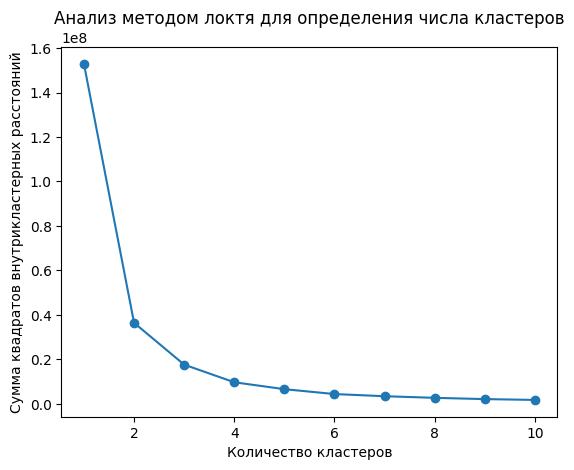

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Предполагается, что rfm_df - ваш DataFrame с показателями RFM_Total

# Выбираем столбец RFM_Total
X = rfm_df_no_outliers[['RFM_Total']]

# Пробуем разное количество кластеров
num_clusters_range = range(1, 11)
inertia_values = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Визуализация метода локтя
plt.plot(num_clusters_range, inertia_values, marker='o')
plt.title('Анализ методом локтя для определения числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов внутрикластерных расстояний')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


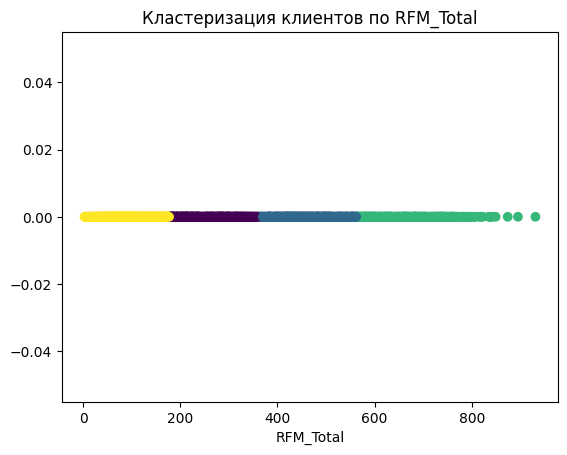

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Выберали число кластеров через метдо локтя
num_clusters = 4

# Выбираем столбец RFM_Total
X = rfm_df_no_outliers[['RFM_Total']]

# Инициализация и обучение модели K-средних
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rfm_df_no_outliers['Cluster'] = kmeans.fit_predict(X)

# Визуализация результатов кластеризации
plt.scatter(rfm_df_no_outliers['RFM_Total'], [0] * len(rfm_df_no_outliers), c=rfm_df_no_outliers['Cluster'], cmap='viridis')
plt.xlabel('RFM_Total')
plt.title('Кластеризация клиентов по RFM_Total')
plt.show()


In [ ]:
cluster_stats = rfm_df_no_outliers.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'RFM_Total': ['mean', 'median']
}).reset_index()

# Вывод описательной статистики
print(cluster_stats)

  Cluster     Recency         Frequency          Monetary          RFM_Total  \
                 mean median       mean median       mean median        mean   
0       0  185.174404  191.0  21.966123   14.0  53.156838   30.0  260.297365   
1       1  410.401796  410.0  16.383838   10.0  35.911336   15.0  462.696970   
2       2  614.755302  612.0  14.063622    9.0  35.587276   15.0  664.406199   
3       3   47.732742   35.0  18.847140   12.0  29.711045   15.0   96.290927   

          
  median  
0  259.0  
1  460.0  
2  660.0  
3   95.0  



Ваши данные представляют характеристики каждого кластера, рассчитанные среди клиентов, принадлежащих каждому кластеру. Давайте проанализируем каждый кластер:

**Кластер 0:**
- Средний период с последней покупки (Recency) составляет примерно 185 дней, а медианный период — 191 день.
- Среднее количество покупок в месяц (Frequency) — около 22, с медианным значением в 14.
- Средние денежные затраты (Monetary) в среднем составляют около 53, а медианные затраты — 30.
- Средний RFM_Total около 260, с медианным значением 259.

**Кластер 1:**
- Средний период с последней покупки (Recency) для этого кластера дольше, примерно 410 дней, с медианным значением в 410 дней.
- Среднее количество покупок в месяц (Frequency) составляет примерно 16, с медианным значением в 10.
- Средние денежные затраты (Monetary) в среднем около 36, а медианные затраты — 15.
- Средний RFM_Total около 463, с медианным значением 460.

**Кластер 2:**
- Средний период с последней покупки (Recency) для этого кластера еще дольше, примерно 615 дней, с медианным значением в 612 дней.
- Среднее количество покупок в месяц (Frequency) составляет примерно 14, с медианным значением в 9.
- Средние денежные затраты (Monetary) в среднем около 36, а медианные затраты — 15.
- Средний RFM_Total около 664, с медианным значением 660.

**Кластер 3:**
- Средний период с последней покупки (Recency) для этого кластера самый короткий, примерно 48 дней, с медианным значением в 35 дней.
- Среднее количество покупок в месяц (Frequency) составляет примерно 19, с медианным значением в 12.
- Средние денежные затраты (Monetary) в среднем около 30, а медианные затраты — 15.
- Средний RFM_Total около 96, с медианным значением 95.

**Выводы:**
- Кластер 3 представляет собой наиболее активных и лояльных клиентов с наименьшим периодом Recency, наивысшим Frequency и сравнительно небольшими Monetary.
- Кластеры 0, 1 и 2 представляют собой менее активных и менее лояльных клиентов с более длительным периодом Recency и более низкими значениями Frequency и Monetary.
- Кластеры 1 и 2 имеют похожие характеристики, но различаются в периоде Recency. Кластер 2 имеет еще более длительный период Recency, что может указывать на более неактивных клиентов.


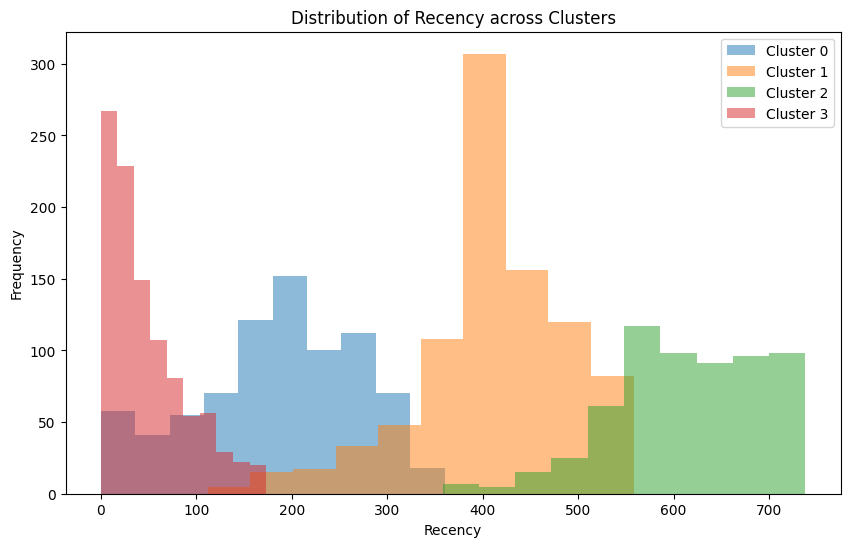

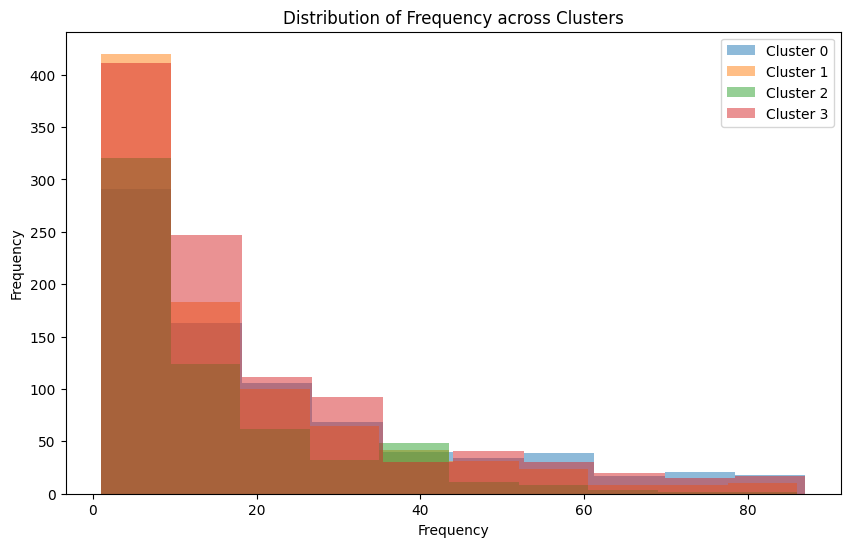

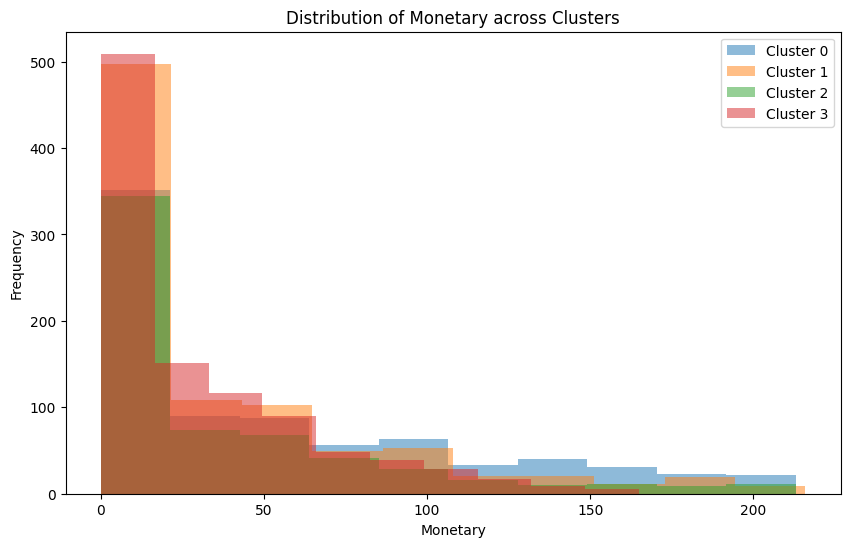

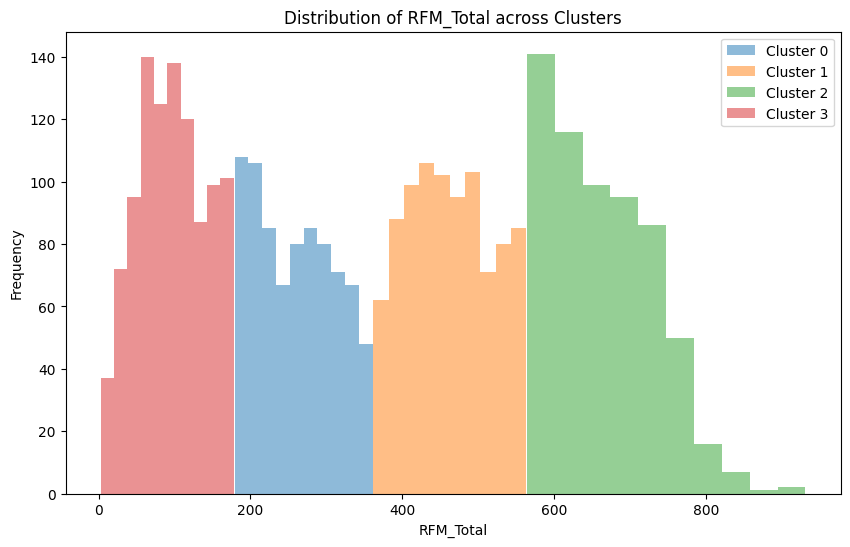

In [ ]:
# Визуализация характеристик кластеров
for column in ['Recency', 'Frequency', 'Monetary', 'RFM_Total']:
    plt.figure(figsize=(10, 6))
    for cluster in cluster_stats['Cluster']:
        plt.hist(rfm_df_no_outliers[rfm_df_no_outliers['Cluster'] == cluster][column], alpha=0.5, label=f'Cluster {cluster}')

    plt.title(f'Distribution of {column} across Clusters')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# АНАЛИЗ ПО КЛАСТЕРАМ

Для кластера 3, который представляет самых активных клиентов, можно предложить эксклюзивные предложения, основываясь на их прошлых покупках. Мы сосредотачиваемся на удержании клиентов из кластера 3, так как они являются наиболее лояльными.

Для клиентов из кластеров 0, 1 и 2, у которых более длительный период Recency, можно разработать программы возрождения. Создадим персонализированные предложения для стимулирования новых покупок

In [ ]:
data_df = pd.merge(data, rfm_df_no_outliers['Cluster'], on='Customer ID', how='left')
data_df.dropna(subset=['Cluster'], inplace=True)
data_df['Price'] = data_df['Price'].str.replace(',', '.').astype(float)
data_df['Revenue'] = data_df['Quantity'] * data_df['Price']
data_df['InvoiceDate'] = pd.to_datetime(data_df['InvoiceDate'], errors='coerce')
data_df.head(100)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,T,M,FD,DoW,Territory,Region,ToD,Q,Revenue,DUNH,B2B,Cluster
4,489440,22350,CAT BOWL,8,2009-12-01,2.55,18087,United Kingdom,09:43:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,20.40,24,0,1.0
5,489440,22349,"DOG BOWL , CHASING BALL DESIGN",8,2009-12-01,3.75,18087,United Kingdom,09:43:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,30.00,24,0,1.0
6,489444,POST,POSTAGE,1,2009-12-01,44.27,12636,USA,09:55:00,12,2009-12-01 00:00:00,Monday,North America,America,morning,Q4,44.27,24,0,2.0
7,489447,POST,POSTAGE,1,2009-12-01,44.27,12362,Belgium,10:10:00,12,2009-12-01 00:00:00,Monday,West Europe,Europe,morning,Q4,44.27,24,0,2.0
8,489450,22087,PAPER BUNTING WHITE LACE,12,2009-12-01,2.95,16321,Australia,10:36:00,12,2009-12-01 00:00:00,Monday,Oceania,Oceania,morning,Q4,35.40,24,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,489678,22079,RIBBON REEL HEARTS DESIGN,4,2009-12-02,1.65,16823,United Kingdom,09:57:00,12,2009-12-02 00:00:00,Tuesday,West Europe,Europe,morning,Q4,6.60,23,0,1.0
209,489678,21490,SET OF THREE 50'S GIFT WRAPS,3,2009-12-02,1.95,16823,United Kingdom,09:57:00,12,2009-12-02 00:00:00,Tuesday,West Europe,Europe,morning,Q4,5.85,23,0,1.0
210,489678,22303,COFFEE MUG APPLES DESIGN,6,2009-12-02,2.55,16823,United Kingdom,09:57:00,12,2009-12-02 00:00:00,Tuesday,West Europe,Europe,morning,Q4,15.30,23,0,1.0
211,489678,22118,JOY WOODEN BLOCK LETTERS,2,2009-12-02,4.95,16823,United Kingdom,09:57:00,12,2009-12-02 00:00:00,Tuesday,West Europe,Europe,morning,Q4,9.90,23,0,1.0


In [ ]:
def Cluster(clr):
    if clr == 0:
        return 'новички'
    elif clr == 1:
        return 'старички'
    elif clr == 2:
        return 'приведения'
    elif clr == 3:
        return 'среднячки'

# Добавим новый столбец "Description_Cluster"
data_df['Description_Cluster'] = data_df['Description'] + "_" + data_df['Cluster'].apply(Cluster)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
!pip install apyori
from apyori import apriori

In [ ]:
transactions_3 = data_df.groupby('Invoice')['Description_Cluster'].apply(list).values.tolist()

association_rules = apriori(transactions_3, min_support=0.002, min_confidence=0.5, min_lift=1, min_length=2)
association_results = list(association_rules)

In [ ]:
# Создадим три группы для рекомендаций
useful_rules = []
trivial_rules = []
non_obvious_rules = []

In [ ]:
# Разделение правил на группы
for rule in association_results:
    items = [item for item in rule.items]
    support = rule.support
    confidence = rule.ordered_statistics[0].confidence
    lift = rule.ordered_statistics[0].lift

    # Определяем тип правила
    if confidence >= 0.6 and lift >= 150:
        trivial_rules.append((items, support, confidence, lift))
    elif confidence >= 0.55 and lift >= 120:
         useful_rules.append((items, support, confidence, lift))
    else:
        non_obvious_rules.append((items, support, confidence, lift))

In [ ]:
print("Полезные правила:")
for rule in useful_rules:
    base_str = ', '.join(rule[0][:-1])
    add_str = rule[0][-1]
    print('Если куплено ({}), то будет куплено ({}) sup = {}, conf = {}, lift = {}'.format(base_str, add_str, str(round(rule[1], 3)), str(round(rule[2], 3)), str(round(rule[3], 3))))

print()
print("\nТривиальные правила:")
for rule in trivial_rules:
    base_str = ', '.join(rule[0][:-1])
    add_str = rule[0][-1]
    print('Если куплено ({}), то будет куплено ({}) sup = {}, conf = {}, lift = {}'.format(base_str, add_str, str(round(rule[1], 3)), str(round(rule[2], 3)), str(round(rule[3], 3))))

print()
print("\nНеочевидные правила:")
for rule in non_obvious_rules:
    base_str = ', '.join(rule[0][:-1])
    add_str = rule[0][-1]
    print('Если куплено ({}), то будет куплено ({}) sup = {}, conf = {}, lift = {}'.format(base_str, add_str, str(round(rule[1], 3)), str(round(rule[2], 3)), str(round(rule[3], 3))))

Полезные правила:
Если куплено (ROSES REGENCY TEACUP AND SAUCER _новички), то будет куплено (GREEN REGENCY TEACUP AND SAUCER_новички) sup = 0.003, conf = 0.741, lift = 172.043
Если куплено (WOODEN HEART CHRISTMAS SCANDINAVIAN_среднячки), то будет куплено (WOODEN TREE CHRISTMAS SCANDINAVIAN_среднячки) sup = 0.002, conf = 0.739, lift = 126.708
Если куплено (WOODEN STAR CHRISTMAS SCANDINAVIAN_среднячки), то будет куплено (WOODEN TREE CHRISTMAS SCANDINAVIAN_среднячки) sup = 0.003, conf = 0.826, lift = 148.696
Если куплено (GARDENERS KNEELING PAD CUP OF TEA _среднячки), то будет куплено (GARDENERS KNEELING PAD KEEP CALM _среднячки) sup = 0.003, conf = 0.676, lift = 115.966
Если куплено (ROSES REGENCY TEACUP AND SAUCER _новички), то будет куплено (GREEN REGENCY TEACUP AND SAUCER_новички) sup = 0.003, conf = 0.741, lift = 172.043
Если куплено (PINK REGENCY TEACUP AND SAUCER_среднячки), то будет куплено (GREEN REGENCY TEACUP AND SAUCER_среднячки) sup = 0.004, conf = 0.698, lift = 143.522
Если 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
